In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
path_hodnoceni = '../../data/koutenska_slova_hodnoceni.csv'
path_result_11 = '../../data/results_PSt_varianta1.csv'
path_result_12 = '../../data/results_PSt_varianta1_all_finished.csv'
path_result_21 = '../../data/results_PSt_varianta2.csv'
path_result_22 = '../../data/results_PSt_varianta2_all_finished.csv'

In [3]:
df_hodnoceni = pd.read_csv(path_hodnoceni, delimiter=';')
df_var11 = pd.read_csv(path_result_11, delimiter=';')
df_var12 = pd.read_csv(path_result_12, delimiter=';')
df_var21 = pd.read_csv(path_result_21, delimiter=';')
df_var22 = pd.read_csv(path_result_22, delimiter=';')

## Varianta 1 - Merge

In [4]:
df_var11_merged = pd.merge(left=df_hodnoceni, right=df_var11, left_on='filename', right_on='filename')
df_var12_merged = pd.merge(left=df_hodnoceni, right=df_var12, left_on='filename', right_on='filename')

In [ ]:
df_var11_merged.to_csv('../../data/var11_merged.csv', sep=';', index=False, encoding='utf-8')
df_var12_merged.to_csv('../../data/var12_merged.csv', sep=';', index=False, encoding='utf-8')

## Varianta 1 - Stats

In [5]:
df_var11_ok = df_var11_merged[df_var11_merged['Typ'] == 'OK']
df_var11_bad = df_var11_merged[df_var11_merged['Typ'] == 'BAD']
df_var11_questionable = df_var11_merged[df_var11_merged['Typ'] == 'QUESTIONABLE']

print('OK: mean {:.3f} ({:.3f}) median {:.3f}'.format(
        df_var11_ok['agreement'].mean(), 
        df_var11_ok['agreement'].std(), 
        df_var11_ok['agreement'].median()))
print('BAD: mean {:.3f} ({:.3f}) median {:.3f}'.format(
        df_var11_bad['agreement'].mean(),
        df_var11_bad['agreement'].std(), 
        df_var11_bad['agreement'].median()))
print('QUESTIONABLE: mean {:.3f} ({:.3f}) median {:.3f}'.format(
        df_var11_questionable['agreement'].mean(), 
        df_var11_questionable['agreement'].std(), 
        df_var11_questionable['agreement'].median()))

OK: mean 0.772 (0.246) median 0.850
BAD: mean 0.426 (0.272) median 0.500
QUESTIONABLE: mean 0.625 (0.282) median 0.740


In [6]:
df_var12_ok = df_var12_merged[df_var12_merged['Typ'] == 'OK']
df_var12_bad = df_var12_merged[df_var12_merged['Typ'] == 'BAD']
df_var12_questionable = df_var12_merged[df_var12_merged['Typ'] == 'QUESTIONABLE']

print('OK: mean {:.3f} ({:.3f}) median {:.3f}'.format(
        df_var12_ok['agreement'].mean(), 
        df_var12_ok['agreement'].std(), 
        df_var12_ok['agreement'].median()))
print('BAD: mean {:.3f} ({:.3f}) median {:.3f}'.format(
        df_var12_bad['agreement'].mean(),
        df_var12_bad['agreement'].std(),
        df_var12_bad['agreement'].median()))
print('QUESTIONABLE: mean {:.3f} ({:.3f}) median {:.3f}'.format(
        df_var12_questionable['agreement'].mean(),
        df_var12_questionable['agreement'].std(),
        df_var12_questionable['agreement'].median()))

OK: mean 0.773 (0.247) median 0.840
BAD: mean 0.423 (0.278) median 0.530
QUESTIONABLE: mean 0.627 (0.282) median 0.740


## Varianta 2 - Merge

In [7]:
re_filename = re.compile('(sent)(\d+)_(\d+)')

In [8]:
data21 = {'filename': [], 'word1': [], 'word2': [], 'index': []}

for row in df_var21.itertuples():
    filename = row.filename
    res = re_filename.search(filename)
    index = hash(tuple(sorted([int(res.group(2)), int(res.group(3))])))
#     abs(hash(matrix.tostring())) % (10 ** 8)
    sent1 = '{}{}_00'.format(res.group(1), res.group(2))
    sent2 = '{}{}_00'.format(res.group(1), res.group(3))
    word1 = df_hodnoceni[df_hodnoceni['filename'] == sent1]['Slovo'].values[0]
    word2 = df_hodnoceni[df_hodnoceni['filename'] == sent2]['Slovo'].values[0]
    # print('{0} = {1} ({3}) + {2} ({4})'.format(filename, sent1, sent2, word1, word2))
    
    data21['filename'].append(filename)
    data21['word1'].append(word1)
    data21['word2'].append(word2)
    data21['index'].append(index)

df_var21_merged = pd.merge(left=df_var21, right=pd.DataFrame(data21), left_on='filename', right_on='filename')

In [9]:
# Change order of columns
cols = df_var21_merged.columns.tolist()
cols = cols[:1] + cols[-2:] + cols[1:-3] + cols[-3: -2]
df_var21_merged = df_var21_merged[cols]
# df_var21_merged

In [10]:
data22 = {'filename': [], 'word1': [], 'word2': [], 'index': []}

for row in df_var22.itertuples():
    filename = row.filename
    res = re_filename.search(filename)
    index = hash(tuple(sorted([int(res.group(2)), int(res.group(3))])))
    sent1 = '{}{}_00'.format(res.group(1), res.group(2))
    sent2 = '{}{}_00'.format(res.group(1), res.group(3))
    word1 = df_hodnoceni[df_hodnoceni['filename'] == sent1]['Slovo'].values[0]
    word2 = df_hodnoceni[df_hodnoceni['filename'] == sent2]['Slovo'].values[0]
    # print('{0} = {1} ({3}) + {2} ({4})'.format(filename, sent1, sent2, word1, word2))
    
    data22['filename'].append(filename)
    data22['word1'].append(word1)
    data22['word2'].append(word2)
    data22['index'].append(index)

df_var22_merged = pd.merge(left=df_var22, right=pd.DataFrame(data22), left_on='filename', right_on='filename')

In [11]:
# Change order of columns
cols = df_var22_merged.columns.tolist()
cols = cols[:1] + cols[-2:] + cols[1:-3] + cols[-3: -2]
df_var22_merged = df_var22_merged[cols]
# df_var22_merged

### Save

In [ ]:
df_var21_merged.to_csv('../../data/var21_merged.csv', sep=';', index=False, encoding='utf-8')
df_var22_merged.to_csv('../../data/var22_merged.csv', sep=';', index=False, encoding='utf-8')

## Variana 1 + 2 - merge

In [12]:
data11_21 = {'filename': [], 'agreement1': [], 'agreement2': []}

for index, row in enumerate(df_var21_merged.itertuples()):
    filename = row.filename
    res = re_filename.search(filename)
    sent1 = '{}{}_00'.format(res.group(1), res.group(2))
    sent2 = '{}{}_00'.format(res.group(1), res.group(3))
    agreement1 = df_var11[df_var11['filename'] == sent1]['agreement'].values[0]
    agreement2 = df_var11[df_var11['filename'] == sent2]['agreement'].values[0]
#     print('{0} = {1} ({3}) + {2} ({4})'.format(filename, sent1, sent2, agreement1, agreement2))
    
    data11_21['filename'].append(filename)
    data11_21['agreement1'].append(agreement1)
    data11_21['agreement2'].append(agreement2)

df_var1121_merged = pd.merge(left=df_var21_merged, right=pd.DataFrame(data11_21), left_on='filename', right_on='filename')

In [13]:
# Change order of columns
cols = df_var1121_merged.columns.tolist()
cols = cols[:3] + cols[-2:] + cols[-4:-2]
df_var1121_merged = df_var1121_merged[cols]

In [14]:
data12_22 = {'filename': [], 'agreement1': [], 'agreement2': []}

for index, row in enumerate(df_var22_merged.itertuples()):
    filename = row.filename
    res = re_filename.search(filename)
    sent1 = '{}{}_00'.format(res.group(1), res.group(2))
    sent2 = '{}{}_00'.format(res.group(1), res.group(3))
    agreement1 = df_var12[df_var12['filename'] == sent1]['agreement'].values[0]
    agreement2 = df_var12[df_var12['filename'] == sent2]['agreement'].values[0]
#     print('{0} = {1} ({3}) + {2} ({4})'.format(filename, sent1, sent2, agreement1, agreement2))
    
    data12_22['filename'].append(filename)
    data12_22['agreement1'].append(agreement1)
    data12_22['agreement2'].append(agreement2)

df_var1222_merged = pd.merge(left=df_var22_merged, right=pd.DataFrame(data12_22), left_on='filename', right_on='filename')

In [15]:
# Change order of columns
cols = df_var1222_merged.columns.tolist()
cols = cols[:3] + cols[-2:] + cols[-4:-2]
df_var1222_merged = df_var1222_merged[cols]

### Save

In [ ]:
df_var1121_merged.to_csv('../../data/var1121_merged.csv', sep=';', index=False, encoding='utf-8')
df_var1222_merged.to_csv('../../data/var1222_merged.csv', sep=';', index=False, encoding='utf-8')

### Trigrams

In [16]:
chars = sorted('pbszfvkg')
# chars = 'g'

In [17]:
data_chars = {'char': [], 'mean': [], 'median': []}
trigrams = set()

def find(str, ch):
    for i, ltr in enumerate(str):
        if ltr == ch:
            yield i

def get_trigrams(words, char):
    for word in words:
        for index in find(word, char):
            s_index = index - 1
            e_index = index + 2
            trigram = word[ max(0, s_index) : min(e_index, len(word))]
                        
            if s_index < 0:
                yield '^' + trigram
            elif e_index > len(word):
                yield trigram + '$'
                continue
            else:  
                yield trigram
            
for char in chars:
    df_char = df_var1222_merged[df_var1222_merged['word1'].str.contains(char)]
    
    data_chars['char'].append(char)
    data_chars['mean'].append(df_char['agreement1'].mean())
    data_chars['median'].append(df_char['agreement1'].median())
    
    trigrams |= set(get_trigrams(df_char['word1'], char))
    
df_chars = pd.DataFrame(data_chars)

In [18]:
df_chars

,char,mean,median
0,b,0.842522,0.950
1,f,0.601000,0.740
2,g,0.792000,0.950
3,k,0.713721,0.840
4,p,0.642789,0.740
5,s,0.607292,0.740
6,v,0.669821,0.765
7,z,0.699630,0.790


In [19]:
data_trigrams = {'trigram': [], 'count': [], 'mean': [], 'median': []}

for trigram in trigrams:
    df_trigram = df_var1222_merged[df_var1222_merged['word1'].str.contains(trigram)]
    
    data_trigrams['trigram'].append(trigram)
    data_trigrams['count'].append(len(df_trigram.index))
    data_trigrams['mean'].append(df_trigram['agreement1'].mean())
    data_trigrams['median'].append(df_trigram['agreement1'].median())

df_trigrams = pd.DataFrame(data_trigrams)
df_trigrams

,count,mean,median,trigram
0,14,0.602143,0.790,^ko
1,3,0.806667,0.840,^be
2,2,0.815000,0.815,eky
3,3,0.856667,0.840,^kr
4,2,0.395000,0.395,eva
5,11,0.932727,0.950,ozb
6,2,0.605000,0.605,ipo
7,8,0.935000,0.950,^sb
8,1,0.110000,0.110,ose
9,2,0.760000,0.760,sva


In [35]:
df_chars.to_csv('../../data/stats_chars.csv', sep=';', index=False, encoding='utf-8')
df_trigrams.to_csv('../../data/stats_trigrams.csv', sep=';', index=False, encoding='utf-8')

## Histogramy

Mean agreement: 0.7042
Median agreement: 0.7600


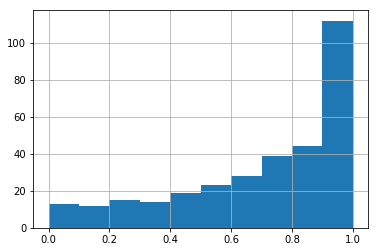

In [20]:
print("Mean agreement: {:.4f}".format(df_var11['agreement'].mean()))
print("Median agreement: {:.4f}".format(df_var11['agreement'].median()))
df_var11['agreement'].hist()

Mean agreement: 0.7046
Median agreement: 0.7900


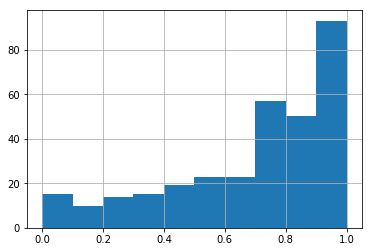

In [21]:
print("Mean agreement: {:.4f}".format(df_var12['agreement'].mean()))
print("Median agreement: {:.4f}".format(df_var12['agreement'].median()))
df_var12['agreement'].hist()

Mean agreement: 0.6549
Median agreement: 0.7100


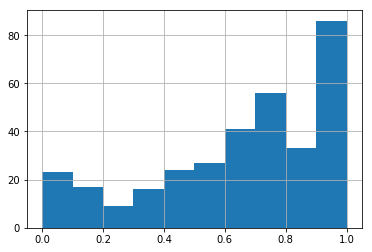

In [22]:
print("Mean agreement: {:.4f}".format(df_var21['agreement'].mean()))
print("Median agreement: {:.4f}".format(df_var21['agreement'].median()))
df_var21['agreement'].hist()

Mean agreement: 0.6627
Median agreement: 0.7500


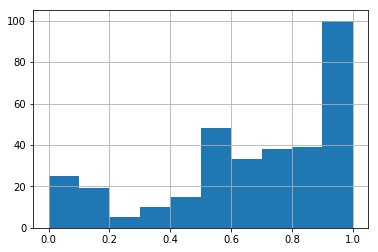

In [23]:
print("Mean agreement: {:.4f}".format(df_var22['agreement'].mean()))
print("Median agreement: {:.4f}".format(df_var22['agreement'].median()))
df_var22['agreement'].hist()